In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import scipy

In [2]:
os.getcwd()

'c:\\Users\\Kanishka\\OneDrive\\Desktop\\AI_DermalScan'

In [15]:
dataset = './Dataset'
outputs_path = './Outputs'
def class_distribution(dataset):
    class_num = 1
    labels = []
    counts = []
    for classes in os.listdir(dataset):
        class_path = os.path.join(dataset, classes)
        labels.append(classes)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            counts.append(num_images)
            print(f'Class {class_num}')
            print(f'Class: {classes}')
            print(f'Number of images: {num_images}')
            print('-----------------------')
            class_num += 1
    return labels, counts
labels, counts = class_distribution(dataset)
        

Class 1
Class: clear skin
Number of images: 300
-----------------------
Class 2
Class: dark spots
Number of images: 300
-----------------------
Class 3
Class: puffy eyes
Number of images: 300
-----------------------
Class 4
Class: wrinkles
Number of images: 300
-----------------------


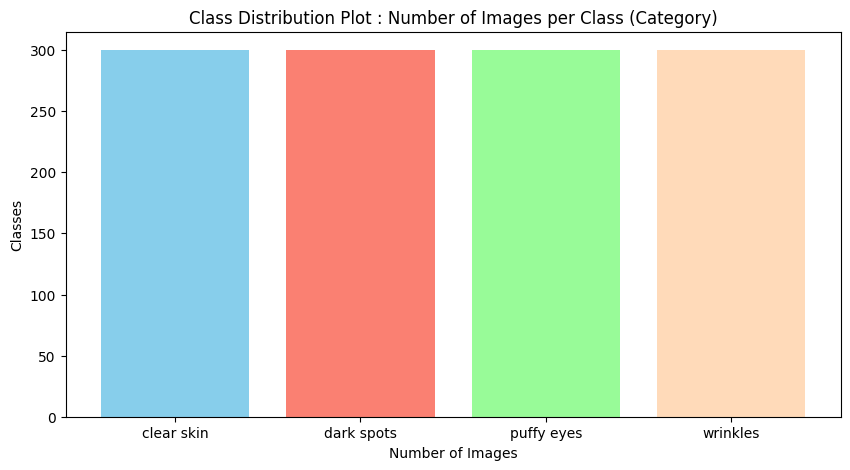

In [16]:
def plot_class_distribution(labels, counts):
    plt.figure(figsize=(10,5))
    plt.bar(labels, counts,color=('skyblue','salmon','palegreen','peachpuff'))
    plt.title('Class Distribution Plot : Number of Images per Class (Category)')
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.savefig('Class_Distribution_Plot.png')
    plt.show()
plot_class_distribution(labels, counts)

In [5]:
#This function plots the augmentation scattering per batch

def plot_augmentation_scattering(generator, title="Augmentation Scattering Per Batch"):

    images, labels = next(generator)

    class_indices = np.argmax(labels, axis=1) #to get the class indices from one-hot encoded labels

    # count how many images per class appear in the batch
    unique_classes, counts = np.unique(class_indices, return_counts=True)

    # class names
    class_labels = list(generator.class_indices.keys())

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(class_labels, counts)
    plt.xlabel("Classes")
    plt.ylabel("Images in this batch")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

    return unique_classes, counts

In [6]:
#In this cell a generator object is created for training and validation data augmentation. The rules for augmentation are defined within the ImageDataGenerator function.

train_datagen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=20,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest',     
    validation_split=0.2     
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
#Different augmentation techniques can be applied by modifying the parameters in the ImageDataGenerator function.

train_datagen1 = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=45,       
    width_shift_range=0,   
    height_shift_range=0.2,  
    zoom_range=0.4,          
    horizontal_flip=False,    
    fill_mode='nearest',     
    validation_split=0.2     
)

valid_datagen1 = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [8]:
#In this cell, the augmentation generator is applied to actual image data from the dataset directory. The images are resized to 224x224 pixels, and the batch size is set to 32. Training and validation subsets are created based on the defined split.(80-20)

img_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  #One-hot encoding
    shuffle=True,
    subset='training'
)

valid_generator = valid_datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

#Using the second set of augmentation parameters

train_generator1 = train_datagen1.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  #One-hot encoding
    shuffle=True,
    subset='training'
)

valid_generator1 = valid_datagen1.flow_from_directory(
    dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


One-hot encoded labels:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


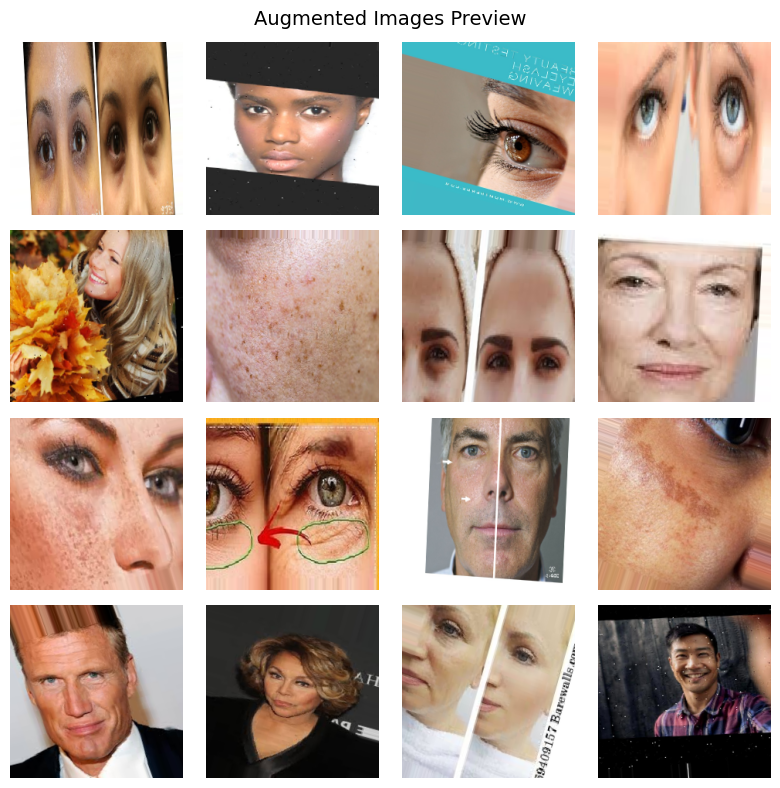

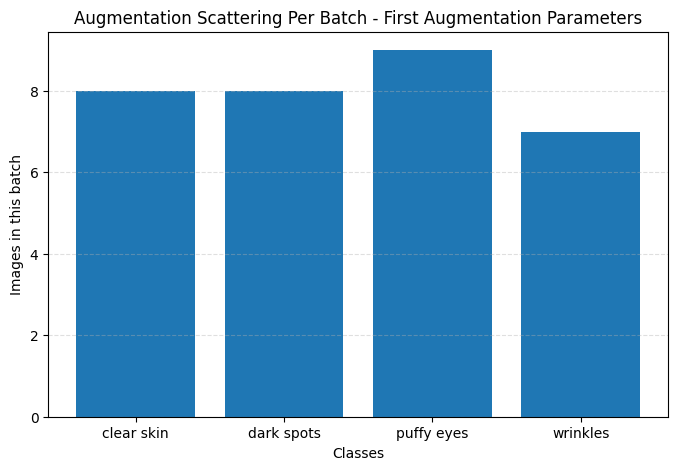

(array([0, 1, 2, 3], dtype=int64), array([8, 8, 9, 7], dtype=int64))

In [12]:
#See augmented images using the First augmentation parameters
# Take one batch from train generator
images, labels = next(train_generator)
print("One-hot encoded labels:\n", labels)


plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.suptitle("Augmented Images Preview", fontsize=14)
plt.tight_layout()

# Save the figure
count = len(os.listdir('Outputs'))
filename = f'Outputs/Augmented_Images_{count+1}.png'
plt.savefig(filename)

plt.show()

plot_augmentation_scattering(train_generator, title="Augmentation Scattering Per Batch - First Augmentation Parameters")

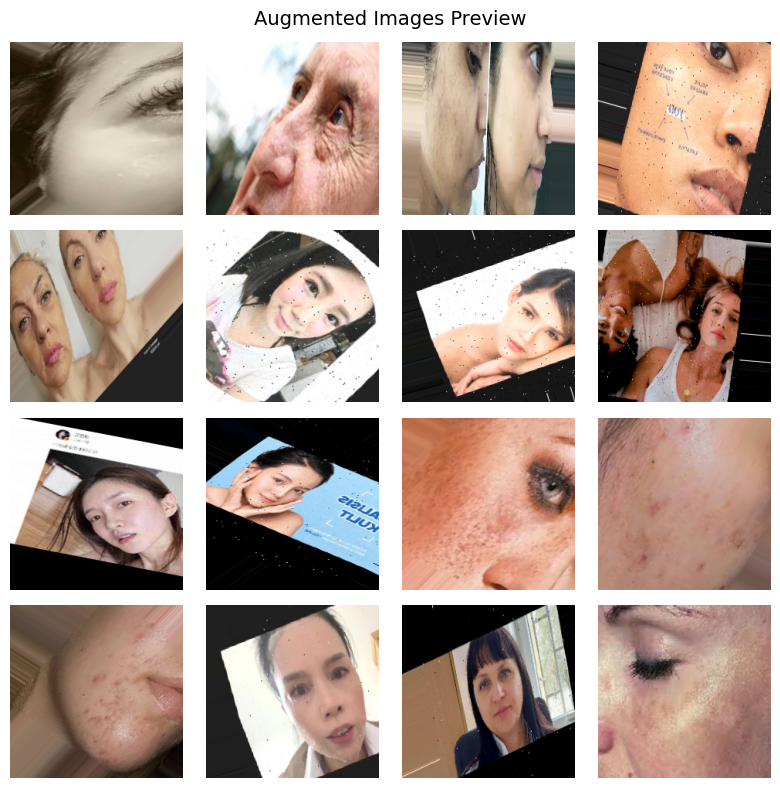

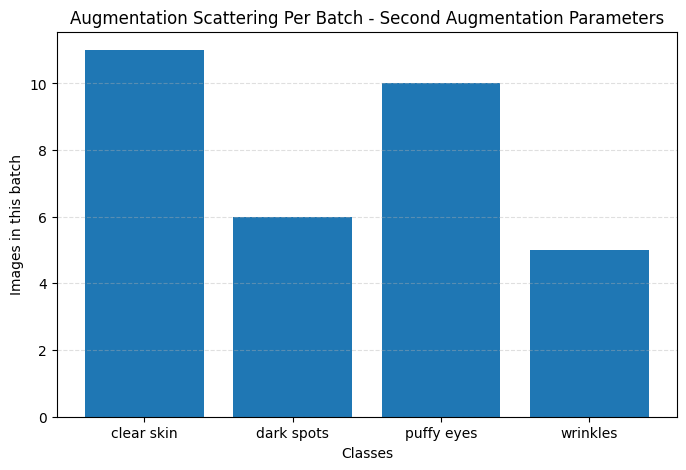

(array([0, 1, 2, 3], dtype=int64), array([11,  6, 10,  5], dtype=int64))

In [13]:
#See augmented images using the Second augmentation parameters
# Take one batch from train generator

images, labels = next(train_generator1)


plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.suptitle("Augmented Images Preview", fontsize=14)
plt.tight_layout()

# Save the figure
count = len(os.listdir('Outputs'))
filename = f'Outputs/Augmented_Images_{count+1}.png'
plt.savefig(filename)

plt.show()

plot_augmentation_scattering(train_generator1, title="Augmentation Scattering Per Batch - Second Augmentation Parameters")